In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, BatchNormalization, MaxPooling2D,Convolution3D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using Theano backend.


In [2]:
input_data = np.array(np.load('./charge.npy'))
output_data = np.load('./truevals.npy')

In [3]:
tvt_ratio=[3,2,2] ##ratio of test validation and test dataset
data_len = len(input_data)
test_end = int(float(tvt_ratio[0])/np.sum(tvt_ratio)*data_len)
valid_end = int(float(tvt_ratio[1])/np.sum(tvt_ratio)*data_len)+test_end
print 'Range of training dataset {}:{}'.format(0,test_end)
print 'Range of validation dataset {}:{}'.format(test_end+1,valid_end)
print 'Range of test dataset {}:{}'.format(valid_end+1,data_len)

Range of training dataset 0:1730
Range of validation dataset 1731:2883
Range of test dataset 2884:4037


In [6]:
test  = input_data[valid_end+1:data_len-1]/100
test_out = np.log10(np.concatenate(output_data[valid_end+1:data_len-1, 0:1]))

INFO (theano.gof.compilelock): Waiting for existing lock by process '13261' (I am process '22864')
INFO:theano.gof.compilelock:Waiting for existing lock by process '13261' (I am process '22864')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/tglauch/.theano/compiledir_Linux-2.6-el6.x86_64-x86_64-with-redhat-6.4-Santiago-x86_64-2.7.10-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/tglauch/.theano/compiledir_Linux-2.6-el6.x86_64-x86_64-with-redhat-6.4-Santiago-x86_64-2.7.10-64/lock_dir


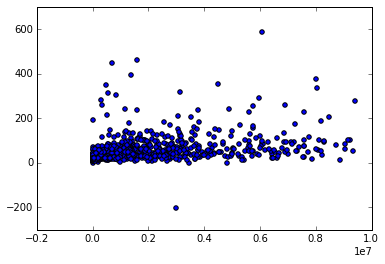

In [5]:
estimator = load_model('./train_hist/model.h5')

In [ ]:
res = estimator.predict(np.expand_dims(test, axis=4))

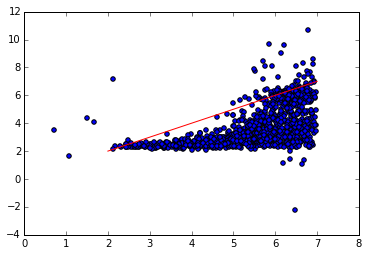

In [9]:

plt.scatter(test_out, res)
plt.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
plt.show()